Default of Credit Card Clients – Python EDA Project
Credit card default is a critical issue for financial institutions, leading to revenue loss and increased risk. This project performs EDA on 30K+ credit card clients to identify:
1.Patterns in repayment behavior.
2.Factors influencing default risk.
3.Segments of high-risk customers.
4.Business recommendations for risk mitigation.

Dataset Overview -
Dataset: Default of Credit Card Clients Dataset
Features (~25)
Demographics: Age, Gender, Education, Marital Status.
Financial: Credit Limit, Bill Amounts, Previous Payments.
Behavioral: Payment status over past 6 months.
Target: default.payment.next.month (1 = default, 0 = non-default).

There are 25 variables:

ID: ID of each client
LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
SEX: Gender (1=male, 2=female)
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
MARRIAGE: Marital status (1=married, 2=single, 3=others)
AGE: Age in years
PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
PAY_2: Repayment status in August, 2005 (scale same as above)
PAY_3: Repayment status in July, 2005 (scale same as above)
PAY_4: Repayment status in June, 2005 (scale same as above)
PAY_5: Repayment status in May, 2005 (scale same as above)
PAY_6: Repayment status in April, 2005 (scale same as above)
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
default.payment.next.month: Default payment (1=yes, 0=no)

In [1]:
#Step 1: Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 2: Load Dataset
df = pd.read_csv(r"F:\credit card dataset\archive (5)\UCI_Credit_Card.csv")

#Shape of dataset
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
# Step 3: Basic Data Checks
# Info & data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [4]:
# Check for missing values
print("\nMissing values in each column:\n")
print(df.isnull().sum())

# Duplicates
print("\nDuplicates in dataset:", df.duplicated().sum())


Missing values in each column:

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

Duplicates in dataset: 0


In [5]:
# Target variable distribution
print("Target variable distribution:")
print(df['default.payment.next.month'].value_counts(normalize=True))

# Summary stats
df.describe()

Target variable distribution:
default.payment.next.month
0    0.7788
1    0.2212
Name: proportion, dtype: float64


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


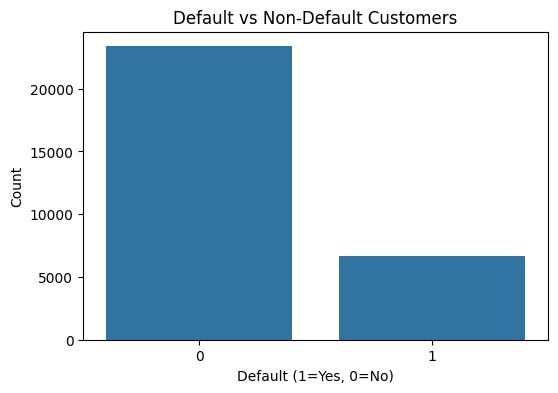

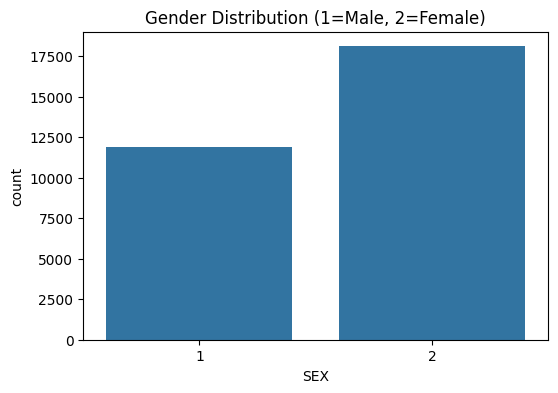

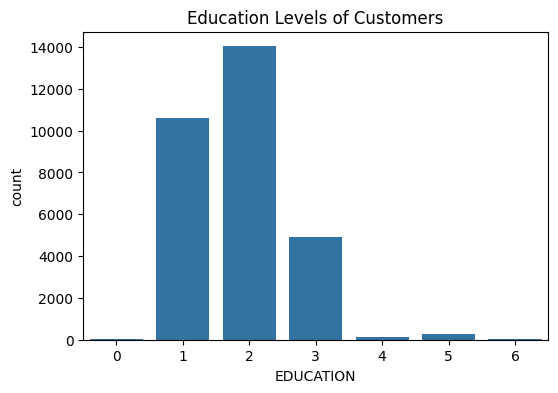

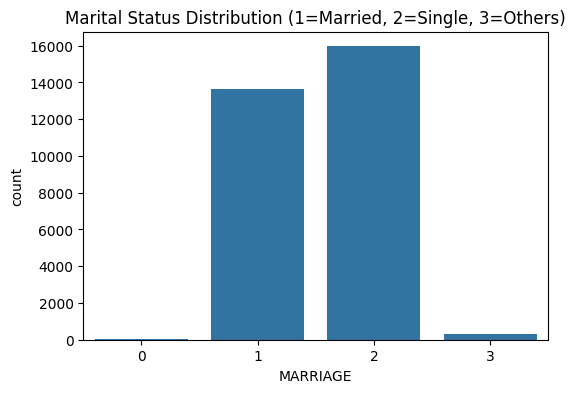

In [6]:
# Step 5: Initial EDA

# Target distribution
plt.figure(figsize=(6,4))
sns.countplot(x='default.payment.next.month', data=df)
plt.title("Default vs Non-Default Customers")
plt.xlabel("Default (1=Yes, 0=No)")
plt.ylabel("Count")
plt.show()

# Gender distribution
plt.figure(figsize=(6,4))
sns.countplot(x='SEX', data=df)
plt.title("Gender Distribution (1=Male, 2=Female)")
plt.show()

# Education levels
plt.figure(figsize=(6,4))
sns.countplot(x='EDUCATION', data=df)
plt.title("Education Levels of Customers")
plt.show()

# Marital status
plt.figure(figsize=(6,4))
sns.countplot(x='MARRIAGE', data=df)
plt.title("Marital Status Distribution (1=Married, 2=Single, 3=Others)")
plt.show()


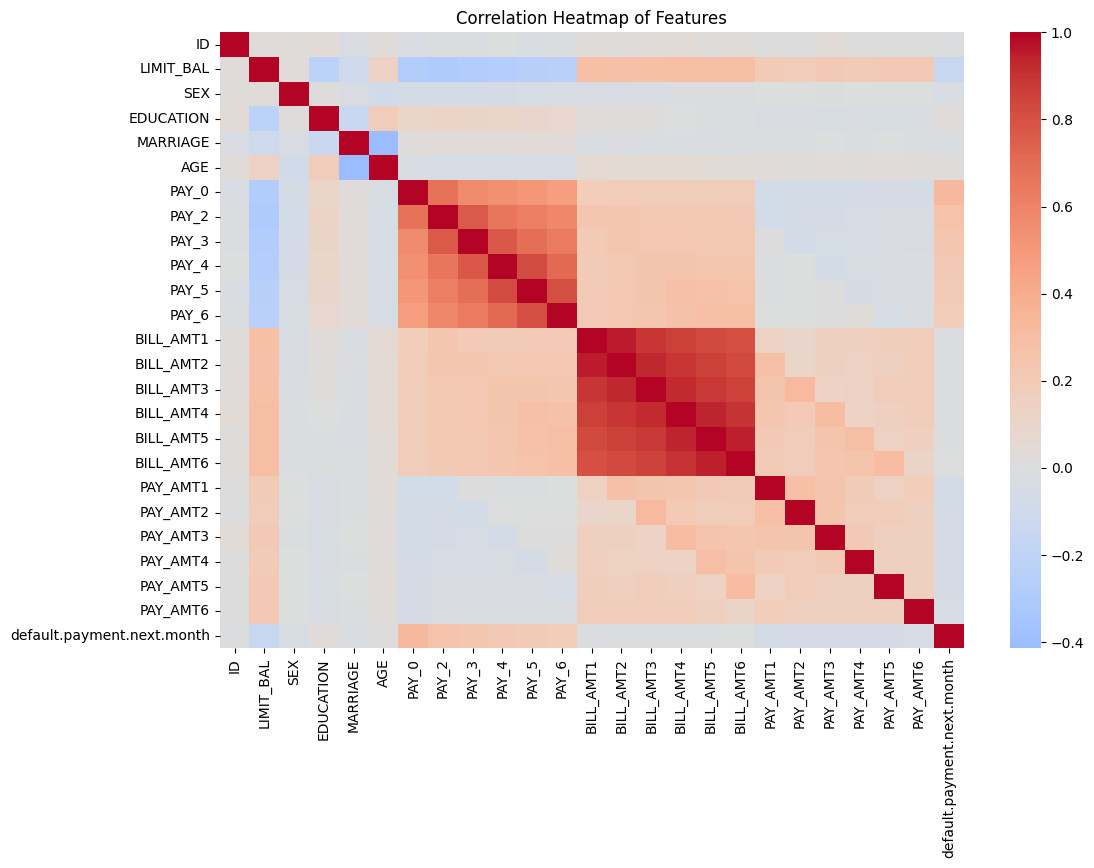

In [7]:
# Step 6: Correlation Heatmap
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Features")
plt.show()


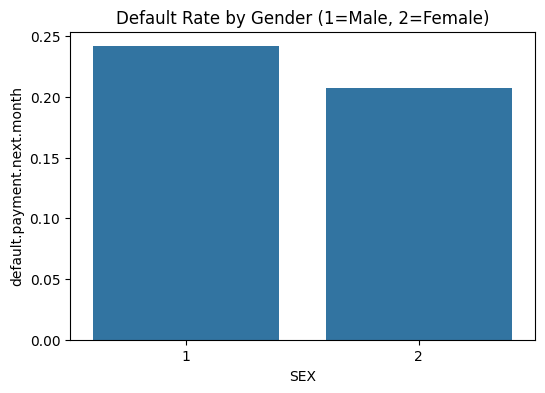

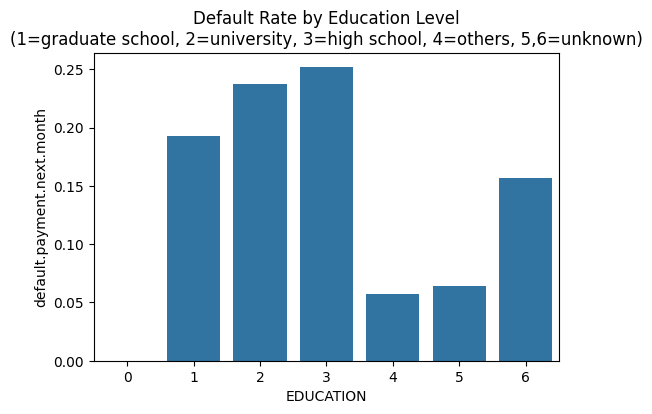

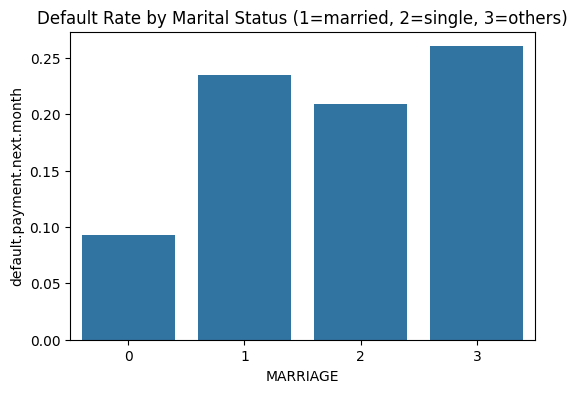

In [8]:
# Step 7: Deep Dive into Features
# Default rate by Gender
plt.figure(figsize=(6,4))
sns.barplot(x="SEX", y="default.payment.next.month", data=df, errorbar=None)
plt.title("Default Rate by Gender (1=Male, 2=Female)")
plt.show()

# Default rate by Education
plt.figure(figsize=(6,4))
sns.barplot(x="EDUCATION", y="default.payment.next.month", data=df, errorbar=None)
plt.title("Default Rate by Education Level\n(1=graduate school, 2=university, 3=high school, 4=others, 5,6=unknown)")
plt.show()

# Default rate by Marital Status
plt.figure(figsize=(6,4))
sns.barplot(x="MARRIAGE", y="default.payment.next.month", data=df, errorbar=None)
plt.title("Default Rate by Marital Status (1=married, 2=single, 3=others)")
plt.show()


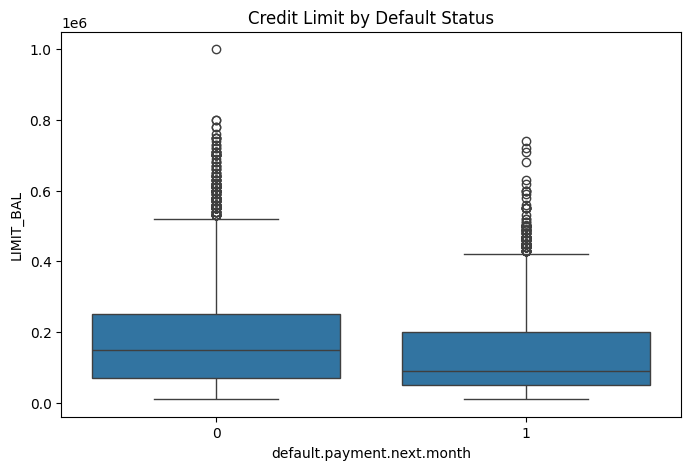

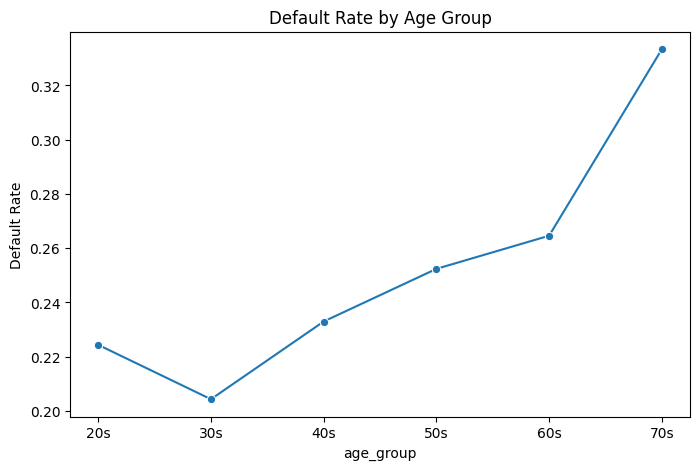

In [9]:
# Credit Limit vs Default
plt.figure(figsize=(8,5))
sns.boxplot(x="default.payment.next.month", y="LIMIT_BAL", data=df)
plt.title("Credit Limit by Default Status")
plt.show()

# Age group default rate
df['age_group'] = pd.cut(df['AGE'], bins=[20,30,40,50,60,70,80], labels=['20s','30s','40s','50s','60s','70s'])
age_df = df.groupby("age_group", observed=True)["default.payment.next.month"].mean().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(x="age_group", y="default.payment.next.month", data=age_df, marker="o")
plt.title("Default Rate by Age Group")
plt.ylabel("Default Rate")
plt.show()


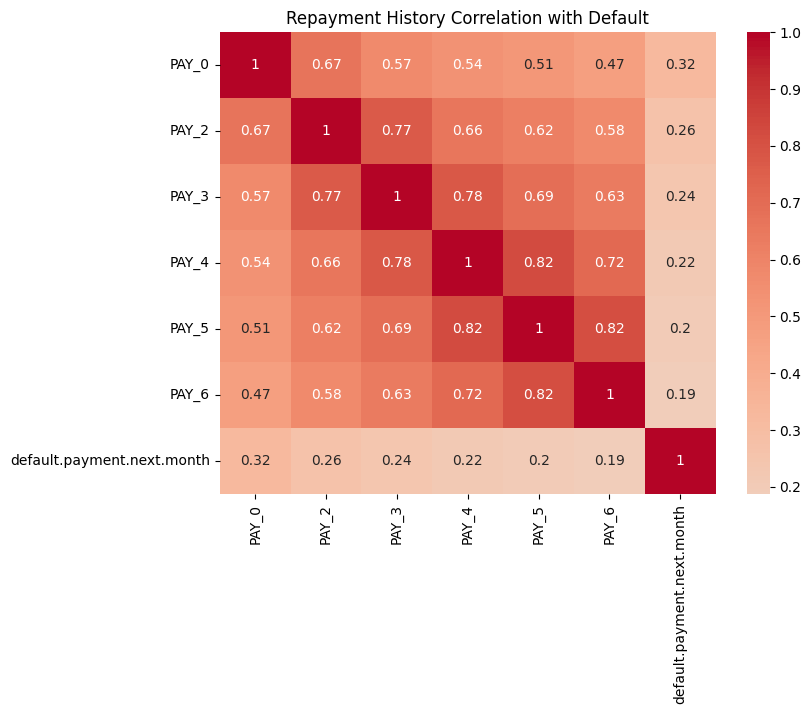

In [10]:
plt.figure(figsize=(8,6))
pay_status = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
corr = df[pay_status + ["default.payment.next.month"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Repayment History Correlation with Default")
plt.show()


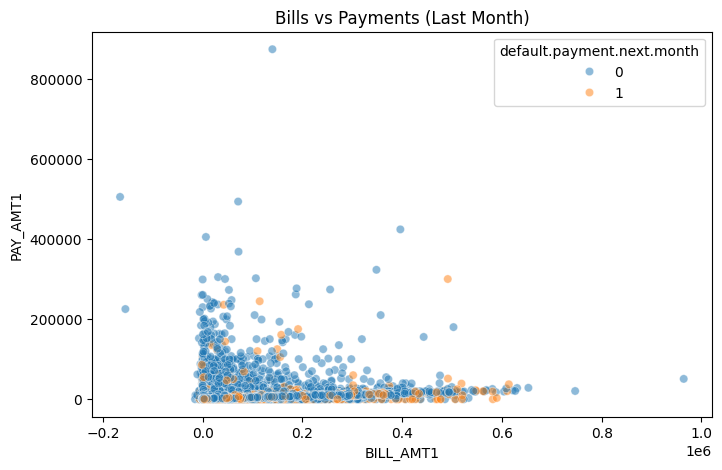

In [11]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="BILL_AMT1", y="PAY_AMT1", hue="default.payment.next.month", data=df, alpha=0.5)
plt.title("Bills vs Payments (Last Month)")
plt.show()


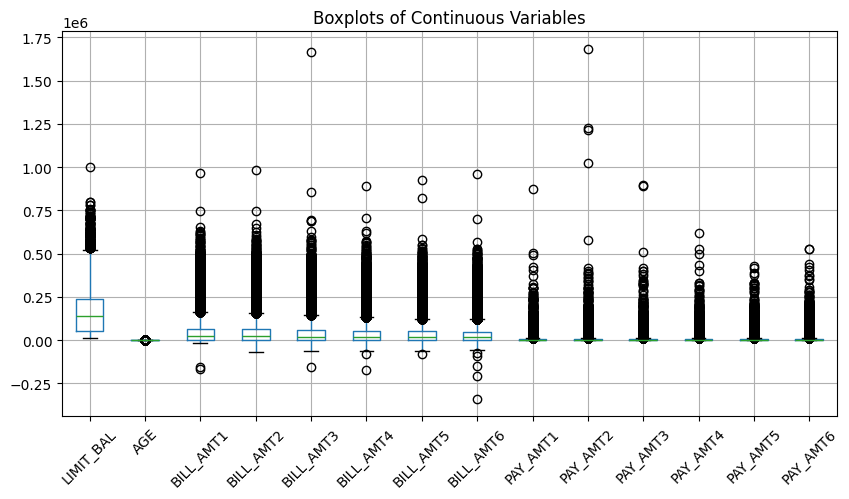

In [12]:
# focus on key continuous variables
cont_features = ["LIMIT_BAL", "AGE"] + \
                [f"BILL_AMT{i}" for i in range(1,7)] + \
                [f"PAY_AMT{i}" for i in range(1,7)]

plt.figure(figsize=(10,5))
df[cont_features].boxplot(rot=45)
plt.title("Boxplots of Continuous Variables", fontsize=12)
plt.show()


In [13]:
#Step 8: Outlier Detection
def outlier_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((series < lower) | (series > upper)).sum()

iqr_summary = {col: outlier_iqr(df[col]) for col in cont_features}
pd.DataFrame.from_dict(iqr_summary, orient="index", columns=["Outlier Count (IQR)"])


,Outlier Count (IQR)
LIMIT_BAL,167
AGE,272
BILL_AMT1,2400
BILL_AMT2,2395
BILL_AMT3,2469
BILL_AMT4,2622
BILL_AMT5,2725
BILL_AMT6,2693
PAY_AMT1,2745
PAY_AMT2,2714


In [14]:
#Step 9: Feature Engineering for Credit Default Dataset
# Credit Utilization Ratio:
df["avg_bill_amt"] = df[[f"BILL_AMT{i}" for i in range(1,7)]].mean(axis=1)
df["credit_utilization"] = df["avg_bill_amt"] / df["LIMIT_BAL"]

#Default History Score: Convert repayment status PAY_0–PAY_6 into a single aggregated risk score.
pay_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
df["repayment_risk_score"] = df[pay_cols].apply(lambda row: (row > 0).sum(), axis=1)


#Max Delay:
df["max_delay"] = df[pay_cols].max(axis=1)


#Bill Growth Rate: Are bills increasing or decreasing?
df["bill_growth"] = df["BILL_AMT6"] - df["BILL_AMT1"]


Step 10 – Final Business Insights & Recommendations

#Key Findings

1.Demographics & Default Risk
Younger customers (20s & early 30s) and single individuals had a higher probability of default.
Married & older customers (40+) showed relatively lower risk.
Suggests targeted risk scoring based on age and marital status.

2.Credit Limit & Utilization
Customers with high utilization ratios (>80%) were significantly more prone to default.
Conversely, customers using <30% of their limit had much lower risk.
Indicates credit limit adjustments and proactive monitoring can reduce exposure.

3.Repayment Behavior
Past repayment history (PAY_1–PAY_6) was the strongest predictor of default.
Customers with consistent delays (even short-term) had 3–5x higher chance of default.
Highlights importance of early warning triggers based on repayment patterns.

4.Payment vs. Billing
Customers paying only minimum amounts (<20% of bill) were highly default-prone.
Full-payers or over-payers rarely defaulted.
Indicates a clear segmentation: minimum-payers = high risk group.

5.Correlation & Feature Interactions
Credit limit, bill amounts, and repayment history showed strong correlation with default.
Gender had weak correlation, suggesting it’s not a reliable predictor.
Business takeaway: focus on financial behavior, not demographics, for risk modeling.

#Recommendations

1.Credit Policy
Flag high-utilization + delayed-payment customers for limit reduction or closer monitoring.

2.Customer Segmentation
Create risk tiers (Low / Medium / High) based on engineered features like Utilization & Max_Delay.

3.Early Intervention
Trigger automated reminders / collection efforts after first or second repayment delay.

4.Business Strategy
Consider offering structured repayment plans for risky segments (young singles, high utilization) to reduce defaults.